> # Taller 1
> Juan Sebastian Moncada Aguilar

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kendalltau

Carga de datos ICFES

In [10]:
datos = pd.read_csv("Saber_11__2020-2.csv") # CSV obtenido de datosabiertos.gov.co
datos.head(3)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD


Ordenar por cuartos del hogar y asumiento que "Sin estrato" es igual a estrato 0:

In [11]:
orden_filas = ['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas']
orden_columnas = ['Estrato 0', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
tabla = pd.crosstab(datos['FAMI_CUARTOSHOGAR'], datos['FAMI_ESTRATOVIVIENDA'])
tabla.rename(columns = {'Sin Estrato': 'Estrato 0'}, inplace = True)
tabla = tabla.reindex(index = orden_filas, columns= orden_columnas)
tabla

FAMI_ESTRATOVIVIENDA,Estrato 0,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6
FAMI_CUARTOSHOGAR,,,,,,,
Uno,1364,10739,8147,3545,782,277,147
Dos,5640,62250,64108,29574,5645,1533,667
Tres,4673,51680,70731,45364,11071,3067,1155
Cuatro,2048,17676,24951,15989,3972,1313,616
Cinco,976,6012,8431,5280,1241,477,268
Seis o mas,773,3278,4715,3087,609,279,196


Matriz de correlación de Kendall

In [12]:
corr_matrix = tabla.corr(method='kendall')
corr_matrix

FAMI_ESTRATOVIVIENDA,Estrato 0,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6
FAMI_ESTRATOVIVIENDA,,,,,,,
Estrato 0,1.000000,1.000000,0.733333,0.733333,0.733333,0.600000,0.600000
Estrato 1,1.000000,1.000000,0.733333,0.733333,0.733333,0.600000,0.600000
Estrato 2,0.733333,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 3,0.733333,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 4,0.733333,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 5,0.600000,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000
Estrato 6,0.600000,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000


Ordenar por cuartos del hogar y asumiento que "Sin estrato" es igual a estrato 7:

In [13]:
orden_filas = ['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas']
orden_columnas = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Estrato 7']
tabla = pd.crosstab(datos['FAMI_CUARTOSHOGAR'], datos['FAMI_ESTRATOVIVIENDA'])
tabla.rename(columns = {'Sin Estrato': 'Estrato 7'}, inplace = True)
tabla = tabla.reindex(index = orden_filas, columns= orden_columnas)
tabla

FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Estrato 7
FAMI_CUARTOSHOGAR,,,,,,,
Uno,10739,8147,3545,782,277,147,1364
Dos,62250,64108,29574,5645,1533,667,5640
Tres,51680,70731,45364,11071,3067,1155,4673
Cuatro,17676,24951,15989,3972,1313,616,2048
Cinco,6012,8431,5280,1241,477,268,976
Seis o mas,3278,4715,3087,609,279,196,773


Matriz de correlación de Kendall

In [14]:
corr_matrix = tabla.corr(method='kendall')
corr_matrix

FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Estrato 7
FAMI_ESTRATOVIVIENDA,,,,,,,
Estrato 1,1.000000,0.733333,0.733333,0.733333,0.600000,0.600000,1.000000
Estrato 2,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667,0.733333
Estrato 3,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667,0.733333
Estrato 4,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667,0.733333
Estrato 5,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000,0.600000
Estrato 6,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000,0.600000
Estrato 7,1.000000,0.733333,0.733333,0.733333,0.600000,0.600000,1.000000


Ordenar por cuartos del hogar y eliminando la categoría "Sin estrato":

In [15]:
orden_filas = ['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas']
orden_columnas = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
tabla = pd.crosstab(datos['FAMI_CUARTOSHOGAR'], datos['FAMI_ESTRATOVIVIENDA'])
tabla = tabla.reindex(index = orden_filas, columns= orden_columnas)
tabla

FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6
FAMI_CUARTOSHOGAR,,,,,,
Uno,10739,8147,3545,782,277,147
Dos,62250,64108,29574,5645,1533,667
Tres,51680,70731,45364,11071,3067,1155
Cuatro,17676,24951,15989,3972,1313,616
Cinco,6012,8431,5280,1241,477,268
Seis o mas,3278,4715,3087,609,279,196


Matriz de correlación de Kendall

In [16]:
corr_matrix = tabla.corr(method='kendall')
corr_matrix

FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6
FAMI_ESTRATOVIVIENDA,,,,,,
Estrato 1,1.000000,0.733333,0.733333,0.733333,0.600000,0.600000
Estrato 2,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 3,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 4,0.733333,1.000000,1.000000,1.000000,0.866667,0.866667
Estrato 5,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000
Estrato 6,0.600000,0.866667,0.866667,0.866667,1.000000,1.000000


Carga del archivo Shapefile

In [17]:
sfile = gpd.read_file("Shapefile/MGN_DPTO_POLITICO.shp") # Arhivo Shapefile obtenido del DANE
sfile.head(3)

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,Shape_Leng,Shape_Area,geometry
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2018,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,1857,15 de junio de 1857,2018,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,1991,Articulo 309 Constitucion Politica de 1991,2018,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."


Transformación de datos

In [18]:
datos1 = datos[['ESTU_COD_DEPTO_PRESENTACION','PUNT_MATEMATICAS']]
datos1 = datos1.dropna(subset=['ESTU_COD_DEPTO_PRESENTACION'])
datos1['ESTU_COD_DEPTO_PRESENTACION'] = datos1['ESTU_COD_DEPTO_PRESENTACION'].astype(str).str.replace('.0', '')
datos1['ESTU_COD_DEPTO_PRESENTACION'] = datos1['ESTU_COD_DEPTO_PRESENTACION'].apply(lambda x: x.zfill(2))
df = datos1.groupby('ESTU_COD_DEPTO_PRESENTACION')['PUNT_MATEMATICAS'].mean()
df.head(3)

ESTU_COD_DEPTO_PRESENTACION
05    49.599657
08    49.965102
11    55.049322
Name: PUNT_MATEMATICAS, dtype: float64

In [19]:
sfile = sfile.merge(df, left_on='DPTO_CCDGO', right_on='ESTU_COD_DEPTO_PRESENTACION', how='left')
sfile.head(3)

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,Shape_Leng,Shape_Area,geometry,PUNT_MATEMATICAS
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2018,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852...",48.708861
1,19,CAUCA,1857,15 de junio de 1857,2018,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870...",47.505106
2,86,PUTUMAYO,1991,Articulo 309 Constitucion Politica de 1991,2018,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730...",49.535329


Puntaje promedio por departamento en matemáticas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


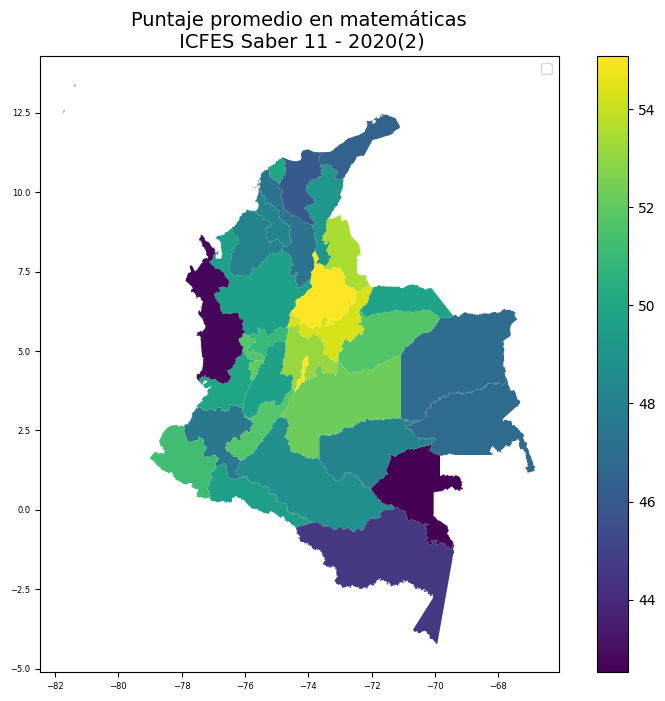

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sfile.plot(column='PUNT_MATEMATICAS', cmap='viridis', legend=True, ax=ax)
plt.tick_params(axis='both', which='both', labelsize=6) # Configurar el tamaño de las etiquetas de los ejes.
plt.title('Puntaje promedio en matemáticas\n ICFES Saber 11 - 2020(2)', fontsize=14)
plt.legend()
plt.show()